In [65]:
# Data Import

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

robotics = pd.read_csv("data/robotics.csv")
cooking = pd.read_csv("data/cooking.csv")
biology = pd.read_csv("data/biology.csv")
crypto = pd.read_csv("data/crypto.csv")
travel = pd.read_csv("data/travel.csv")
diy = pd.read_csv("data/diy.csv")             
test = pd.read_csv("data/test.csv") 

df_hash = {
    "cooking": cooking,
    "crypto": crypto,
    "robotics": robotics,
    "biology": biology,
    "travel": travel,
    "diy": diy,
    "test": test
}

['id' 'title' 'content' 'tags']
id                                                         1
title      What is the right approach to write the spin c...
content    <p>Imagine programming a 3 wheel soccer robot....
tags                                          soccer control
Name: 0, dtype: object
id                                                         2
title      How can I modify a low cost hobby servo to run...
content    <p>I've got some hobby servos (<a href="http:/...
tags                                         control rcservo
Name: 1, dtype: object
id                                                         3
title      What useful gaits exist for a six legged robot...
content    <p><a href="http://www.oricomtech.com/projects...
tags                                               gait walk
Name: 2, dtype: object


In [77]:
# Data Exploration
print df_hash['biology'].columns.values

print df_hash['biology'].iloc[0]
print df_hash['biology'].iloc[1]
print df_hash['biology'].iloc[2]

print "\nNumber of rows by topic"
for topic, df in df_hash.iteritems():
    print topic + ": " +  str(len(df.index))

['id' 'title' 'content' 'tags']
id                                                         1
title      criticality ribosome binding site relative sta...
content    prokaryotic translation critical efficient tra...
tags       [ribosome, binding-sites, translation, synthet...
Name: 0, dtype: object
id                                                         2
title      rnase contamination rna based experiment preve...
content    anyone suggestion prevent rnase contamination ...
tags                                     [rna, biochemistry]
Name: 1, dtype: object
id                                                         3
title                    lymphocyte size clustered two group
content    tortora writes principle anatomy physiology ly...
tags                  [immunology, cell-biology, hematology]
Name: 2, dtype: object

Number of rows by topic
biology: 13196
cooking: 15404
travel: 19279
robotics: 2771
crypto: 10432
diy: 25918
test: 81926


In [5]:
import nltk
# When running this notebook for first time,
# uncomment command below, select "stopwords" in gui, and follow prompt to download

# nltk.download()
from nltk.corpus import stopwords

# In Python, searching a set is much faster than searching a list, so convert the stop words to a set
stops = set(stopwords.words("english"))  

https://www.kaggle.com/c/word2vec-nlp-tutorial#part-1-for-beginners-bag-of-words

In [67]:
from bs4 import BeautifulSoup
import re
from nltk.stem import WordNetLemmatizer

def separate_tags(tags):
    return tags.split(" ")

def clean_data(raw_data):
    if raw_data:
        # remove html tags
        soup = BeautifulSoup(raw_data, "html.parser")

        [s.extract() for s in soup(['pre', 'code'])]
            
        question_text = soup.get_text()
        
        # remove everything but letters
        letters_only = re.sub("[^a-zA-Z]", " ", question_text) 
            
        # normalize case
        words = letters_only.lower().split()   

        # remove stopwords         
        meaningful_words = [w for w in words if not w in stops] 
        
        # remove permutations of the same word by reducing it to its stem
        wordnet_lemmatizer = WordNetLemmatizer()
        meaningful_word_stems = map(lambda x: wordnet_lemmatizer.lemmatize(x) , meaningful_words)
        return( " ".join( meaningful_word_stems )) 
    else:
        return ""

u'imagine programming wheel soccer robot type controller would use spinning p pid goal controller make robot stand defined angle degree turn back rotated hand robot use stepper motor robot servo need implement software written sample p type controller already movement fairly good would like make better possible code follows range robot movement number returned compass number applied pwm'

In [68]:
# Data Preprocessing

for topic, df in df_hash.iteritems():
    if topic == "test":
        next
    else:
        df.content = df.content.apply(lambda x: clean_data(x) )
        df.title = df.title.apply(lambda x: clean_data(x) )
        df.tags = df.tags.apply(lambda y: separate_tags(y) )
        # drop rows without tags
        df.tags.replace(['', ' ', 'untagged'], np.nan, inplace=True)
        df.dropna(subset=['tags'], inplace=True)

Cleaning and parsing the training set of tags for each topic...

0    [ribosome, binding-sites, translation, synthet...
1                                  [rna, biochemistry]
2               [immunology, cell-biology, hematology]
3                                       [cell-culture]
Name: tags, dtype: object
0    prokaryotic translation critical efficient tra...
1    anyone suggestion prevent rnase contamination ...
2    tortora writes principle anatomy physiology ly...
3    various people lab prepare liter lb add kanamy...
Name: content, dtype: object
0                           [baking, cookies, texture]
1                          [oven, cooking-time, bacon]
2                                               [eggs]
3    [substitutions, please-remove-this-tag, baking...
Name: tags, dtype: object
0    chocolate chip cooky always crisp get chewy co...
1    heard people cooking bacon oven laying strip c...
2    always use brown extra large egg honestly say ...
3                         use

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

def top_tfidf_feats(row, features, top_n=20):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_indicies = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_indicies]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''

    x = np.arange(len(dfs["feature"]))
    fig = plt.figure(figsize=(12, 14), facecolor="w")

    ax = fig.add_subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_frame_on(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
    ax.set_title( str(dfs.label), fontsize=16)
    ax.barh(x, dfs["tfidf"], align='center', color='#3F5D7D')
    ax.set_yticks(x)
    ax.set_ylim([-1, len(x) +1])
    ax.set_xlim([0, 7])
    yticks = ax.set_yticklabels(dfs["feature"])
    plt.show()

In [69]:
from wordcloud import WordCloud

def print_wordcloud(dfs):
    text = ' '.join(str(x) for x in dfs.tags.values) 
    
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                          relative_scaling = 1.0, max_words=100,
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


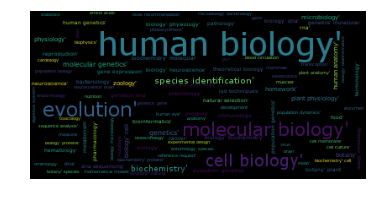

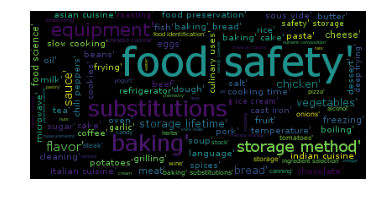

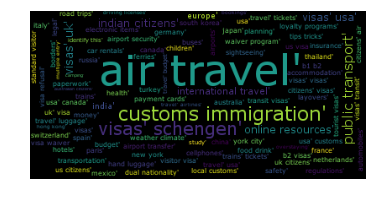

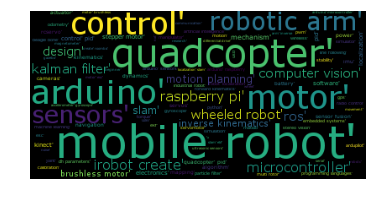

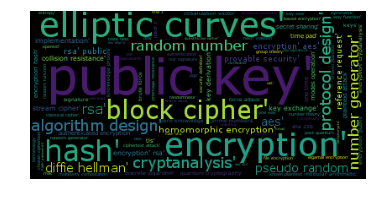

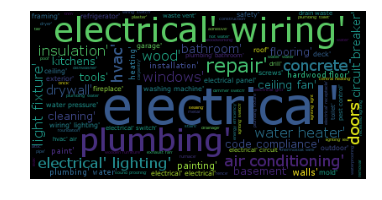

In [70]:
# Data Visualization

from sklearn.feature_extraction.text import TfidfVectorizer

vect_hash = {}

for topic, df in df_hash.iteritems():
    if topic == "test":
        next
    else:
        vect_hash[topic] = TfidfVectorizer( lowercase=True , stop_words="english" ,min_df=.01, max_df= .95 ) 
        X = vect_hash[topic].fit_transform(df.title)

        dfs = top_tfidf_feats( vect_hash[topic].idf_ , vect_hash[topic].get_feature_names()  ) 
        dfs.label = topic
        print topic
        print "Finding terms with top tf-idf from question's titles"
        plot_tfidf_classfeats_h(dfs)
        print "Finding most popular tags"
        print_wordcloud(df)

        

In [ ]:
# Implementation

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, f1_score, make_scorer, accuracy_score, confusion_matrix

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
from time import time 
        
df = df_hash["robotics"]
# for topic, df in df_hash.iteritems():

parameters = {
    "tfidf__min_df" : [ 0.001, 0.005, 0.01 , 0.05],
    "tfidf__max_df" : [0.9, 0.95 , 0.975, 0.99],
    "DT_class__estimator__max_depth" : [10, 20, 50, 100, 200, 500],
    "DT_class__estimator__criterion" : ["gini", "entropy"]
    
}

steps = [('tfidf', TfidfVectorizer(lowercase=True, stop_words="english") ),
            ("DT_class", OneVsRestClassifier(DecisionTreeClassifier( random_state = 42)))]



pipeline = Pipeline(steps)
#     X_train, X_test, y_train, y_test_vect = train_test_split(df.content,\
#                                                         Y, \
#                                                         test_size=0.33,\
#                                                         random_state=42)
#     pipeline.fit(X_train, y_train)
#     y_predicted_vect = pipeline.predict(X_test)


mlb = MultiLabelBinarizer()
Y = pd.DataFrame( mlb.fit_transform(df.tags) )

t0 = time()
clf = GridSearchCV(pipeline, parameters, cv=3, scoring='f1_weighted')
clf.fit( df.content, Y )
print("done in %0.3fs" % (time() - t0))


y shape
(2771, 231)
y
   0    1    2    3    4    5    6    7    8    9   ...   221  222  223  224  \
0    0    0    0    0    0    0    0    0    0    0 ...     0    0    0    0   

   225  226  227  228  229  230  
0    0    0    0    0    0    0  

[1 rows x 231 columns]
true K: 

27


/Users/vlevitas-local/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vlevitas-local/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/vlevitas-local/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 20 is present in all training examples.
  str(classes[c]))
/Users/vlevitas-local/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 177 is present in all training examples.
  str(classes[c]))
/Users/vlevitas-local/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 204 is present in all training examples.
  str(classes[c]))
/Us

In [ ]:

print clf.best_estimator_
print("Best score: %0.3f" % clf.best_score_)
print("Best parameters set:")
best_parameters = clf.best_estimator_.get_params()
print best_parameters
print "\n\n"
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

print "\n\n"
print clf.cv_results_.keys()



In [ ]:
# for topic, df in df_hash.iteritems():
print "evaluating"
t0 = time()
y_prediction =  cross_val_predict(pipeline, df.content, Y, cv=10 )
print("done in %0.3fs" % (time() - t0))
print "y_prediction: \n"
print y_prediction.shape
print type(y_prediction)
print type(y_prediction[0])
#     print y_predicted_vect.to_dense

Y_inv = mlb.inverse_transform(y_prediction)
#     y_test_inv = mlb.inverse_transform(y_test_vect.values)
#     y_pred_inv = mlb.inverse_transform(y_predicted_vect)
#     y_pred_inv = y_predicted_vect.apply(lambda x: d[x].inverse_transform(x))
#     y_test_inv = y_test_vect.apply(lambda x: d[x].inverse_transform(x))

#     print clf.best_estimator_
print "baallss"
#     print Y_inv
print accuracy_score(Y, y_prediction) 
report = classification_report(Y, y_prediction) 
print(report)

#     print cv.best_score_
#     print cv.best_params_
#     print clf.feature_importances_  
#     model = SelectFromModel(clf, prefit=True)
#     print model





In [ ]:
# y = mlb.inverse_transform(Y)
index = 0
for actual, pred in zip(df.tags, Y_inv):
        print('index: {0} :: {1} => {2}'.format(index, actual, ', '.join(pred)))
        index = index +1

        

In [ ]:
print y_prediction.shape
# print y_test[0]

In [ ]:
# print confusion_matrix(Y, y_prediction) 
# print y_pred_inv
# print mlb.inverse_transform(0)


https://www.civisanalytics.com/blog/workflows-in-python-using-pipeline-and-gridsearchcv-for-more-compact-and-comprehensive-code/

In [ ]:
# Numpy arrays are easy to work with, so convert the result to an 
# array
# train_data_features = train_data_features.toarray()
# report = classification_report(Y, y_prediction) 
# print report
f1_score(Y, y_prediction, average='weighted')